This script analyzes the commit messages parsed from the Java's projects [here.](https://github.com/Semiu/java-codesecurity/blob/main/1-data-scraping-curating/5.%20Parsing%20the%20commit%20logs.ipynb)

It aims to identify vulnerabilities-related words in the commit messages. In acheiving this, it checks if any of the tokens from the CVEs illustrated [in this script](https://github.com/Semiu/java-codesecurity/blob/main/2-text-classification-CVE-Commits/1b.%20Text%20Analysis%20of%20CVE's%20vulnerabilities%20names%20and%20entities.ipynb) are found in the tokens generated from git commit messages.

In [37]:
#Import the libraries
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Semiu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
#Create stop words from fundamental English stop words
stopwords = set(w.rstrip() for w in open(r'C:\Users\Semiu\Documents\java-codesecurity\2-text-classification-CVE-Commits\stopwords.txt'))

In [39]:
#Initialize WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [40]:
#Tokenization and Text pre-processing function
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2 or len(t)==1]   # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "7.0"
    return tokens

In [41]:
#Tokenize each of the commit message
def msg_to_tokens():
    
    msg_tokens = []
    
    git_commit = pd.read_csv("F:\\Dataset\\githubrepo\\Java\\java_commit_info.csv")
    
    for msg in git_commit['message']:
        
        try:
            msg = str(msg).encode('ascii', 'ignore') # this will throw exception if bad characters
            msg = msg.decode('utf-8')
            tokens = my_tokenizer(msg) #Call the my_tokenizer function for each cve in the list_of_phrases
            
            msg_tokens.append(tokens)
        except Exception as e:
            print(e)
    return msg_tokens

In [42]:
#A list variable to hold the msg_to_tokens
list_of_msg_token = msg_to_tokens()

In [ ]:
list_of_msg_token

In [43]:
#Load the Java CVE tokens
def load_java_CVE_tokens():
    java_tokens = []
    
    java_CVE_tokens = pd.read_csv(r"C:\Users\Semiu\Documents\java-codesecurity\2-text-classification-CVE-Commits\tokens.csv")
    
    for token in java_CVE_tokens['vulnerability_tokens']:
        java_tokens.append(token)
        
    return java_tokens

In [44]:
#A list variable to hold the load_java_CVE_tokens
list_of_java_tokens = load_java_CVE_tokens()

In [45]:
#A function to check tokens in the list_of_msg_token that are also present in list_of_java_tokens
def check_tokens():
    co_tokens = []
    not_co = []
    for git_token in list_of_msg_token:
        for g_t in git_token:
            if g_t in list_of_java_tokens:
                co_tokens.append(g_t)
            else:
                not_co.append(g_t)
    return co_tokens, not_co

In [46]:
#A list variable to hold the return values of the check_tokens() function
list_checked_tokens = check_tokens()

In [47]:
#Convert the vulnerabilities tokens to data frame to work with the visualization library
checked_tokens_df = pd.DataFrame(list_checked_tokens[0],columns=["git_commit_tokens"])

C:\Users\Semiu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


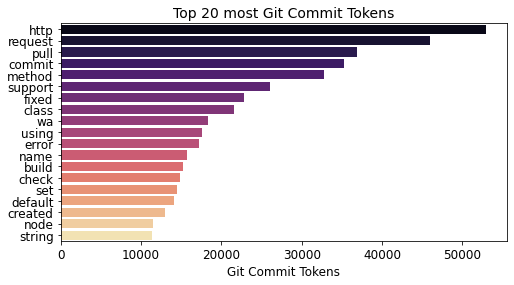

In [48]:
# Plot the Top 20 vulnerabilities tokens
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(checked_tokens_df["git_commit_tokens"].value_counts()[1:20].values, checked_tokens_df["git_commit_tokens"].value_counts()[1:20].index, palette=('magma'));
# customization
plt.xlabel("Git Commit Tokens",fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top 20 most Git Commit Tokens',size=14)
plt.show();